# Forecasting for Banking Using Time Series Methods, Homework 1 & 2
© Hugo Bourrousse  
September 2025

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Load dataframe
final_df = pd.read_pickle("final_df.pkl")
final_df.head(10)

,de_loan,de_dep,de_cap,de_gdp,de_ints,de_intl,de_ciss,de_hicp,de_gdp_sa,de_dep_sa,de_loan_sa,de_cap_sa,de_gdp_g,de_loan_g,de_dep_g,de_loan_d,de_dep_d
1997Q4,3415366.0,2987309.0,197963.0,506217.29,NaN,5.490000,NaN,0.516667,500342.745117,2.973880e+06,3.419621e+06,197611.568877,NaN,NaN,NaN,NaN,NaN
1998Q1,3435838.0,3005318.0,202938.0,481205.72,NaN,5.000000,NaN,0.206667,489744.562729,3.009455e+06,3.436576e+06,203130.855336,NaN,NaN,NaN,20472.0,18009.0
1998Q2,3517512.0,3064839.0,207787.0,492703.92,NaN,4.886667,NaN,0.296667,497434.159663,3.061233e+06,3.513953e+06,207260.974178,NaN,NaN,NaN,81674.0,59521.0
1998Q3,3566887.0,3088691.0,207969.0,509263.72,NaN,4.386667,NaN,0.213333,501637.063256,3.102089e+06,3.565296e+06,208671.590352,NaN,NaN,NaN,49375.0,23852.0
1998Q4,3698872.0,3237024.0,212630.0,521496.95,NaN,4.013333,NaN,0.116667,515445.087886,3.222472e+06,3.703481e+06,212252.531485,3.018399,8.300897,8.359196,131985.0,148333.0
1999Q1,3663429.0,3153883.0,218397.0,495250.00,NaN,3.863333,NaN,0.090000,504038.054019,3.158224e+06,3.664216e+06,218604.546279,2.918560,6.624032,4.943404,-35443.0,-83141.0
1999Q2,3728913.0,3200743.0,227867.0,507670.00,NaN,4.073333,NaN,0.183333,512543.922598,3.196977e+06,3.725140e+06,227290.140398,3.037540,6.009958,4.434295,65484.0,46860.0
1999Q3,3816760.0,3253088.0,232738.0,524670.00,NaN,4.866667,NaN,0.236667,516812.621128,3.267199e+06,3.815057e+06,233524.268499,3.025207,7.005352,5.322546,87847.0,52345.0
1999Q4,3878472.0,3302450.0,236956.0,537290.00,NaN,5.160000,NaN,0.370000,531054.862871,3.287604e+06,3.883304e+06,236535.347085,3.028407,4.855534,2.021177,61712.0,49362.0
2000Q1,3892954.0,3330627.0,241791.0,515500.00,2.73,5.460000,NaN,0.546667,524647.383840,3.335212e+06,3.893790e+06,242020.777984,4.088844,6.265305,5.604013,14482.0,28177.0


## 1. Univariate analysis (Homework 1)

**Instructions**:
1. Fit an ARMA process on the growth rate of banks'capital on the sample 1997-2014
2. Forecast using the estimated model for the period 2015-2018

### 1.1 Graphical analysis

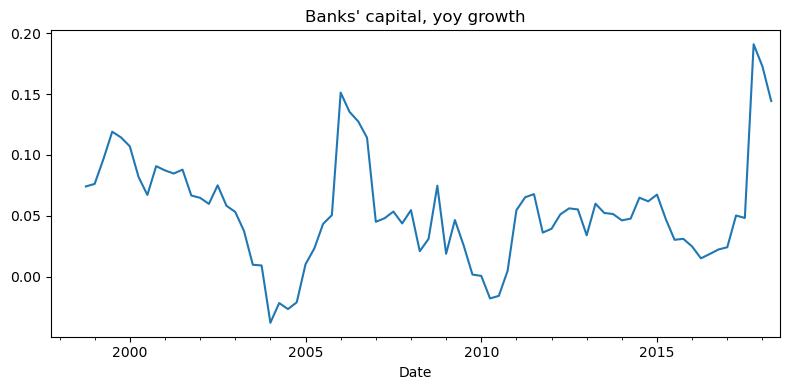

In [3]:
# Create the series
final_df['de_cap_g'] = final_df['de_cap'].pct_change(4,fill_method=None)

# plot the series
plt.figure(figsize=(8,4))
final_df['de_cap_g'].plot(title="Banks' capital, yoy growth")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

**Note:** inspecting the series, we can already expect that estimating up to 2014 and forecasting after, we're going to do a poor job as we will likely completely miss that sharp increase

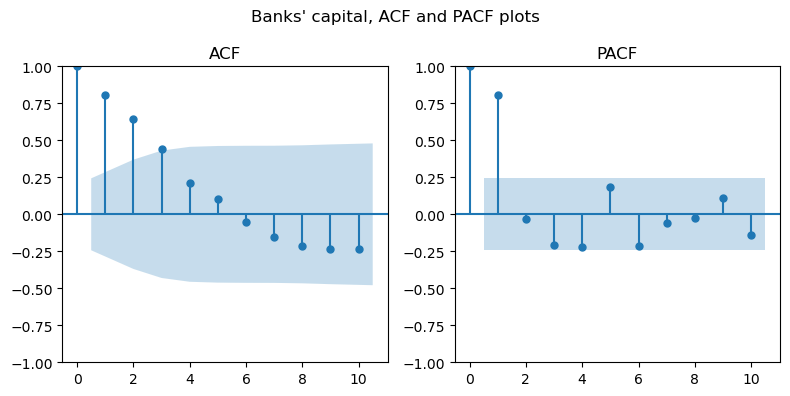

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# we select the relevant sample for estimation
series = final_df['de_cap_g'][final_df.index<"2015Q1"].dropna()

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle("Banks' capital, ACF and PACF plots")
plot_acf(series, lags=10, ax=axes[0], title='ACF')
plot_pacf(series, lags=10, ax=axes[1], title='PACF')
plt.tight_layout()
plt.show()

**Observations**
- the ACF does decay gradually but turns negative after 5 lags $\Rightarrow$ not so conclusive, suggest AR but also perhaps MA terms
- the PACF cutoffs after one lag, which is indicative of an autoregressive process of order 1
- We can try: AR(1), ARMA(1,4) 

### 1.2. Estimation

In [5]:
from statsmodels.tsa.arima.model import ARIMA
# define and fit the models

# AR(1)
model = ARIMA(series, order=(1,0,0))
result_ar1 = model.fit()

# ARMA(1,4)
model = ARIMA(series, order=(1,0,4))
result_arma14 = model.fit()

# printing results
print(result_ar1.summary())
print('\n\n')
print(result_arma14.summary())

                               SARIMAX Results                                
Dep. Variable:               de_cap_g   No. Observations:                   65
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 151.923
Date:                Thu, 06 Nov 2025   AIC                           -297.847
Time:                        10:40:18   BIC                           -291.324
Sample:                    12-31-1998   HQIC                          -295.273
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0533      0.015      3.594      0.000       0.024       0.082
ar.L1          0.8019      0.087      9.257      0.000       0.632       0.972
sigma2         0.0005   5.45e-05      9.852      0.0

- the ARMA(1,4) has a better fit but is a big model given our sample size
- the AR(1) looks OK but we have to be careful with the residuals, we strongly reject the normality null in the JB test

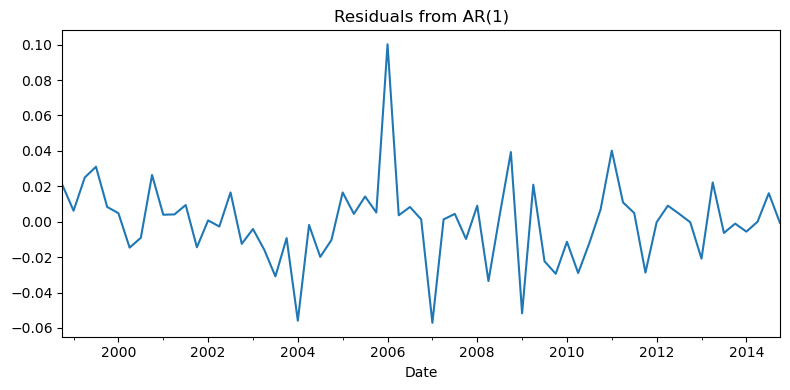

In [6]:
# Inspecting the residuals
resid_ar1 = result_ar1.resid

plt.figure(figsize=(8,4))
resid_ar1.plot(title="Residuals from AR(1)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

So the big culprit is what happens around 2006, which we could also see on the yoy growth series of banks' capital. So we can try to estimate the model with a dummy for that time period

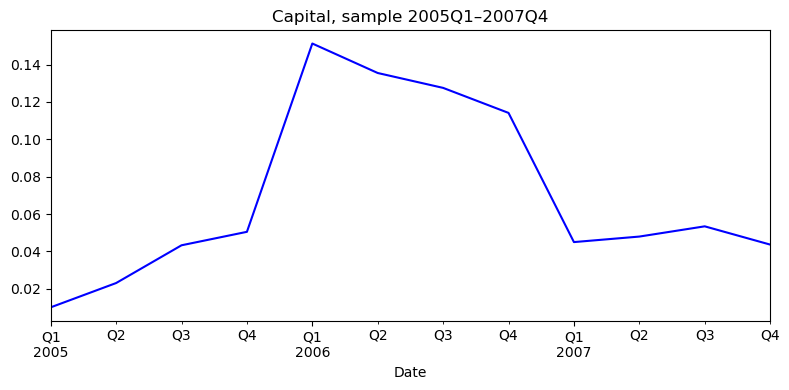

In [7]:
# Let's cleanly identify the "problematic" quarters
subsample = series.loc["2005Q1":"2007Q4"]
plt.figure(figsize=(8,4))
subsample.plot(title="Capital, sample 2005Q1–2007Q4", linewidth=1.5, color="blue")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

Ok, so the problem is the full year 2006, let's create a dummy for that year and see if this improves the fit

In [8]:
dummy = ((series.index >= "2006Q1")&(series.index <= "2006Q4")).astype(int)

exog_with_const = sm.add_constant(dummy)  # manually adding a constant to the dummy
model = ARIMA(series, order=(1,0,0),exog=exog_with_const,trend='n')  # adding trend='n' to avoid having double constant

result_ar1_dum = model.fit()
print(result_ar1_dum.summary())

                               SARIMAX Results                                
Dep. Variable:               de_cap_g   No. Observations:                   65
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 166.567
Date:                Thu, 06 Nov 2025   AIC                           -325.134
Time:                        10:40:29   BIC                           -316.437
Sample:                    12-31-1998   HQIC                          -321.702
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0491      0.014      3.477      0.001       0.021       0.077
x1             0.0848      0.018      4.815      0.000       0.050       0.119
ar.L1          0.8311      0.073     11.318      0.0

$\Rightarrow$ clear improvement in fit when adding the constant

Let's check whether adding a second lag for the AR part improves the fit

In [9]:
# define AR(2) with dummy
model = ARIMA(series, order=(2,0,0),exog=exog_with_const,trend='n')
result_ar2_dum = model.fit()
print(result_ar2_dum.summary())

                               SARIMAX Results                                
Dep. Variable:               de_cap_g   No. Observations:                   65
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 166.614
Date:                Thu, 06 Nov 2025   AIC                           -323.228
Time:                        10:41:42   BIC                           -312.356
Sample:                    12-31-1998   HQIC                          -318.938
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0494      0.016      3.179      0.001       0.019       0.080
x1             0.0849      0.018      4.836      0.000       0.050       0.119
ar.L1          0.8007      0.121      6.630      0.0

In [10]:
# Let's summarise the info in a table
models = {
    'AR(1)': result_ar1,
    'AR(1) + dum': result_ar1_dum,
    'AR(2) + dum': result_ar2_dum
}

# Create a summary table
summary_fit = []
for name, res in models.items():
    summary_fit.append({
        'Model': name,
        'AIC': res.aic,
        'BIC': res.bic,
        'Log-Likelihood': res.llf
    })

fit_table = pd.DataFrame(summary_fit)
fit_table.set_index('Model', inplace=True)

print("\nFit measures of the three models estimated")
print("="*60)
print(fit_table.to_string())
print("="*60)


Fit measures of the three models estimated
                    AIC         BIC  Log-Likelihood
Model                                              
AR(1)       -297.846976 -291.323814      151.923488
AR(1) + dum -325.134184 -316.436635      166.567092
AR(2) + dum -323.227564 -312.355628      166.613782


Improvement in fit is minimal. At this point, it's much better to be parsimonious and go for the AR(1) with dummy

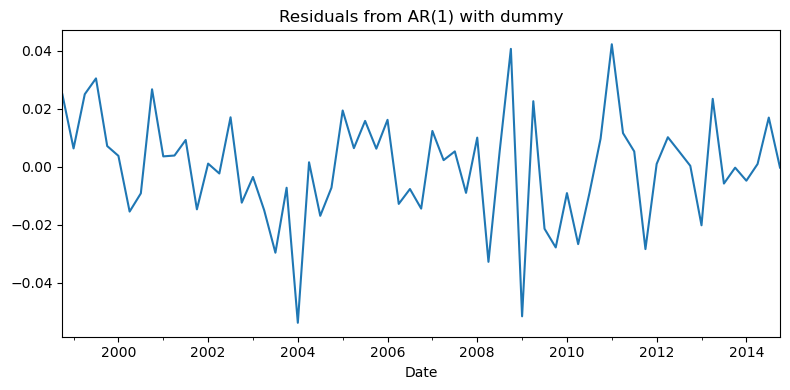

In [11]:
# Diagnosis check on the residuals for the selected model
resid_ar1_dum = result_ar1_dum.resid

plt.figure(figsize=(8,4))
resid_ar1_dum.plot(title="Residuals from AR(1) with dummy")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

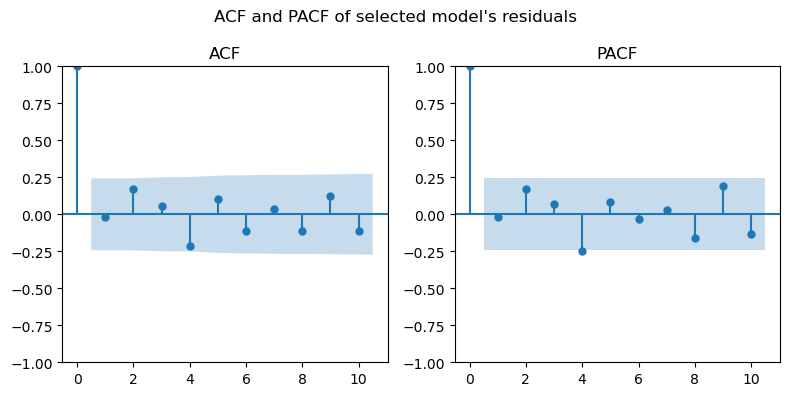

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle("ACF and PACF of selected model's residuals")
plot_acf(resid_ar1_dum, lags=10, ax=axes[0], title='ACF')
plot_pacf(resid_ar1_dum, lags=10, ax=axes[1], title='PACF')
plt.tight_layout()
plt.show()

In [13]:
# Last, we check what the auto model selection based on information criterion would have suggested
import pmdarima as pm

# Automatic ARMA/ARIMA selection
model_sel = pm.auto_arima(
    series,
    start_p=0, max_p=5,        # AR order range
    start_q=0, max_q=5,        # MA order range
    d=0,                        # No differencing, we already work with the series in first differences
    seasonal=False,             # no seasonal adjustment needed
    stepwise=True,              # Faster search
    information_criterion='aic' # we could use something else
)
print("Selected ARMA order:", model_sel.order)

C:\Users\hbourrou\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\hbourrou\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\hbourrou\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\hbourrou\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\hbourrou\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed 

Selected ARMA order: (2, 0, 3)


$\Rightarrow$ the suggested model is an ARMA(2,3), quite more complex than the AR(1)

Can you investigate and try to explain why? Is it better really than our best model AR(1)+dum ?

### 1.3. Forecasting

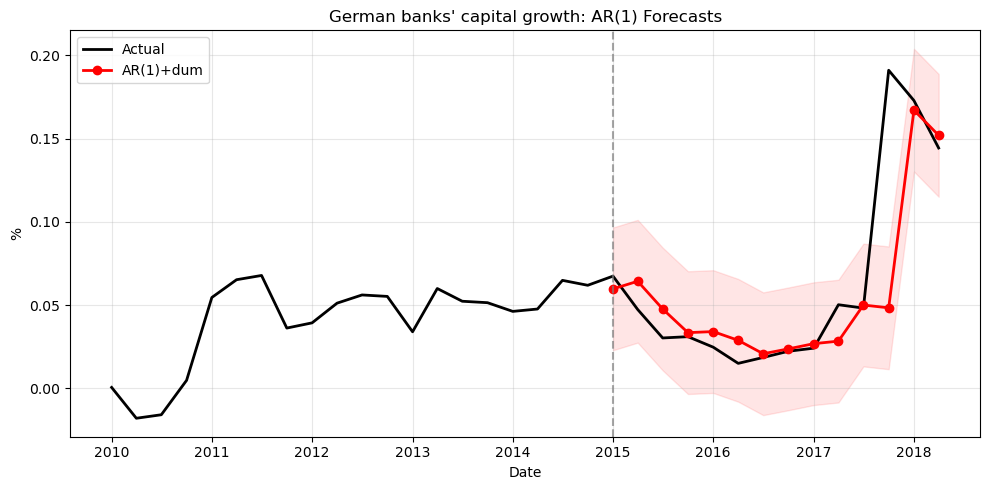

In [14]:
# Test period
test_start = "2015Q1"
test_end = "2018Q4"
test_series = final_df['de_cap_g'].loc[test_start:test_end].dropna()

# Get the complete series including test period
full_series = final_df['de_cap_g'].dropna()

# Create dummy 
dummy_full = ((full_series.index >= "2006Q1") & (full_series.index <= "2006Q4")).astype(int)
exog_full = sm.add_constant(dummy_full)

# use .apply() to append test data to the model without refitting
extended_model = result_ar1_dum.apply(
    full_series, 
    exog=exog_full,
    trend='n',
    refit=False
)

# 1-step ahead forecast straigthforward with the .fittedvalues method
forecast_ar1_dum = extended_model.fittedvalues.loc[test_series.index]

# Calculate confidence intervals manually
model_std = result_ar1_dum.resid.std()
forecast_lower = forecast_ar1_dum - 1.96*model_std
forecast_upper = forecast_ar1_dum + 1.96*model_std

# Plot
plot_data = final_df['de_cap_g'].loc["2010Q1":test_end].dropna()

plt.figure(figsize=(10, 5))
plt.plot(plot_data.index.to_timestamp(), plot_data, label='Actual', color='black', linewidth=2)
plt.plot(forecast_ar1_dum.index.to_timestamp(), forecast_ar1_dum, label='AR(1)+dum',color='red', marker='o', linewidth=2)
plt.fill_between(forecast_ar1_dum.index.to_timestamp(),
                 forecast_lower, 
                 forecast_upper,
                 color='red', alpha=0.1)
plt.axvline(pd.Timestamp('2015-01-01'), color='gray', linestyle='--', alpha=0.7)
plt.title("German banks' capital growth: AR(1) Forecasts")
plt.xlabel('Date')
plt.ylabel('%')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
# Finally let's compute forecast metrics
mae = np.abs(test_series-forecast_ar1_dum).mean()
mse = ((test_series-forecast_ar1_dum)**2).mean()

# Print results
print("Forecast Accuracy of preferred model")
print("=" * 40)
for_acc = pd.DataFrame({
    'Model': ['AR(1) + dum'],
    'MSE': [mse],
    'MAE': [mae]
})
print(for_acc.to_string(index=False))
print("=" * 40)

Forecast Accuracy of preferred model
      Model      MSE      MAE
AR(1) + dum 0.001564 0.018132


Final comments:
- the inclusion of the step dummy was for in-sample fit, to "neutralize" that sharp increase in capital growth that the simple AR(1) was not able to capture
- the introduction of the step dummy mostly gave discipline to the estimated residuals and made them gaussian
- in terms of forecasting accuracy, it is not given that the model with dummy will do anything better than a simpler AR(1)
  $\Rightarrow$ try it if you want! 

## 2. Multivariate Analysis (Homework #2)

Now we move to multivariate analysis. We are asked to propose a proper VAR model for banks' capital, and see whether it improves the forecasts obtained in the univariate case.  

Note that a "proper" VAR model is a bit vague, and could mean different things depending on context. Here, we are in a pure forecasting exercise. We do not aim to conduct any structural analysis such as identifying shocks, for instance. Therefore, we don't really care about the economic meaning of our VAR system, we just want to see whether adding variables can improve forecasting performance with respect to the simpler AR(1) model. So we will understand "proper" as (i) stable and (ii) with serially uncorrelated white noise residuals.

Technically, only variables that Granger cause capital would improve forecasting performance over the univariate model. Note that testing for Granger causality between capital and a bunch of other variables is striclty equivalent to estimating the VAR with all the variables and looking at whether the lags of the variables other than capital are significant in the capital equation. 

Based on the second lab class, I will neither include loan growth nor deposit growth in the VAR

In [16]:
final_df.head(15)

,de_loan,de_dep,de_cap,de_gdp,de_ints,de_intl,de_ciss,de_hicp,de_gdp_sa,de_dep_sa,de_loan_sa,de_cap_sa,de_gdp_g,de_loan_g,de_dep_g,de_loan_d,de_dep_d,de_cap_g
1997Q4,3415366.0,2987309.0,197963.0,506217.29,NaN,5.490000,NaN,0.516667,500342.745117,2.973880e+06,3.419621e+06,197611.568877,NaN,NaN,NaN,NaN,NaN,NaN
1998Q1,3435838.0,3005318.0,202938.0,481205.72,NaN,5.000000,NaN,0.206667,489744.562729,3.009455e+06,3.436576e+06,203130.855336,NaN,NaN,NaN,20472.0,18009.0,NaN
1998Q2,3517512.0,3064839.0,207787.0,492703.92,NaN,4.886667,NaN,0.296667,497434.159663,3.061233e+06,3.513953e+06,207260.974178,NaN,NaN,NaN,81674.0,59521.0,NaN
1998Q3,3566887.0,3088691.0,207969.0,509263.72,NaN,4.386667,NaN,0.213333,501637.063256,3.102089e+06,3.565296e+06,208671.590352,NaN,NaN,NaN,49375.0,23852.0,NaN
1998Q4,3698872.0,3237024.0,212630.0,521496.95,NaN,4.013333,NaN,0.116667,515445.087886,3.222472e+06,3.703481e+06,212252.531485,3.018399,8.300897,8.359196,131985.0,148333.0,0.074090
1999Q1,3663429.0,3153883.0,218397.0,495250.00,NaN,3.863333,NaN,0.090000,504038.054019,3.158224e+06,3.664216e+06,218604.546279,2.918560,6.624032,4.943404,-35443.0,-83141.0,0.076176
1999Q2,3728913.0,3200743.0,227867.0,507670.00,NaN,4.073333,NaN,0.183333,512543.922598,3.196977e+06,3.725140e+06,227290.140398,3.037540,6.009958,4.434295,65484.0,46860.0,0.096637
1999Q3,3816760.0,3253088.0,232738.0,524670.00,NaN,4.866667,NaN,0.236667,516812.621128,3.267199e+06,3.815057e+06,233524.268499,3.025207,7.005352,5.322546,87847.0,52345.0,0.119099
1999Q4,3878472.0,3302450.0,236956.0,537290.00,NaN,5.160000,NaN,0.370000,531054.862871,3.287604e+06,3.883304e+06,236535.347085,3.028407,4.855534,2.021177,61712.0,49362.0,0.114405
2000Q1,3892954.0,3330627.0,241791.0,515500.00,2.730000,5.460000,NaN,0.546667,524647.383840,3.335212e+06,3.893790e+06,242020.777984,4.088844,6.265305,5.604013,14482.0,28177.0,0.107117


### 2.1. VAR estimation

In [17]:
from statsmodels.tsa.api import VAR

# Let's try with all the potentially interesting variables
train_end = "2014Q4"
df_var = final_df[['de_cap_g','de_hicp','de_ciss','de_gdp_g','de_ints']].loc[:train_end].dropna()

# define the VAR and look at automatic lag selection from IC
model_var = VAR(df_var)
lagsel_var = model_var.select_order(maxlags=5)
print(lagsel_var.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -13.62      -13.43   1.215e-06      -13.55
1      -22.44     -21.32*   1.806e-10     -22.01*
2      -22.47      -20.43   1.798e-10      -21.68
3      -22.84      -19.86  1.328e-10*      -21.70
4      -22.69      -18.78   1.767e-10      -21.18
5     -22.95*      -18.12   1.716e-10      -21.09
-------------------------------------------------


In [18]:
# Let's start with 1 lag
model_var.fit(1).summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, Nov, 2025
Time:                     10:42:34
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -21.3464
Nobs:                     57.0000    HQIC:                  -22.0038
Log likelihood:           264.621    FPE:                1.83688e-10
AIC:                     -22.4217    Det(Omega_mle):     1.11366e-10
--------------------------------------------------------------------
Results for equation de_cap_g
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.005006         0.011930            0.420           0.675
L1.de_cap_g         0.738190         0.082936            8.901           0.000
L1.de_hicp          0.058286         0.020432            2.853   

- GDP growth and the interest rate are not significant in the capital equation
- it could however be the results of several factors, such as collinearity with other regressors
- before discarding them, I'll quickly estimate a VAR with capital, gdp and ints to see whether it confirms what we see in the larger VAR

In [19]:
VAR(df_var[['de_cap_g','de_gdp_g','de_ints']]).fit().summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, Nov, 2025
Time:                     10:42:38
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -11.9463
Nobs:                     57.0000    HQIC:                  -12.2093
Log likelihood:           122.090    FPE:                4.21968e-06
AIC:                     -12.3764    Det(Omega_mle):     3.44282e-06
--------------------------------------------------------------------
Results for equation de_cap_g
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.007341         0.012613            0.582           0.561
L1.de_cap_g         0.772323         0.087287            8.848           0.000
L1.de_gdp_g         0.001145         0.001358            0.843   

We see in the capital equation that nor gdp nor ints are significant, even in this reduced VAR, so we proceed and remove them from the larger one

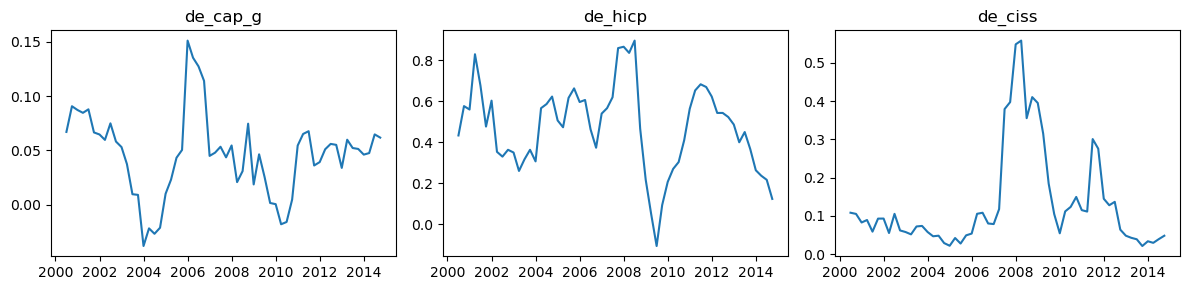

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

for i, col in enumerate(['de_cap_g', 'de_hicp', 'de_ciss']):
    axes[i].plot(df_var[col].index.to_timestamp(),df_var[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [21]:
model_var2 = VAR(df_var[['de_cap_g','de_hicp','de_ciss']]).fit(1)
print(model_var2.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, Nov, 2025
Time:                     10:42:43
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -16.5865
Nobs:                     57.0000    HQIC:                  -16.8495
Log likelihood:           254.336    FPE:                4.07447e-08
AIC:                     -17.0166    Det(Omega_mle):     3.32434e-08
--------------------------------------------------------------------
Results for equation de_cap_g
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.003153         0.008055           -0.391           0.695
L1.de_cap_g         0.727265         0.081575            8.915           0.000
L1.de_hicp          0.045327         0.016302            2.780   

In [25]:
# Stability of the VAR
roots = model_var2.roots         
moduli = np.abs(roots)

print("\nRoots' moduli:", moduli)


Roots' moduli: [1.25734743 1.25734743 1.15678861]


All roots are outside the unit circle (modulus greater than 1) $\Rightarrow$ the VAR is stable!

In [26]:
# Residuals diagnostics
# multivariate Portmanteau test
portmanteau=model_var2.test_whiteness(nlags=8)
print(portmanteau.summary())

Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 8 is zero. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         105.9          82.53   0.001 63
----------------------------------------


$\Rightarrow$ residuals are serially correlated, let's investigate further

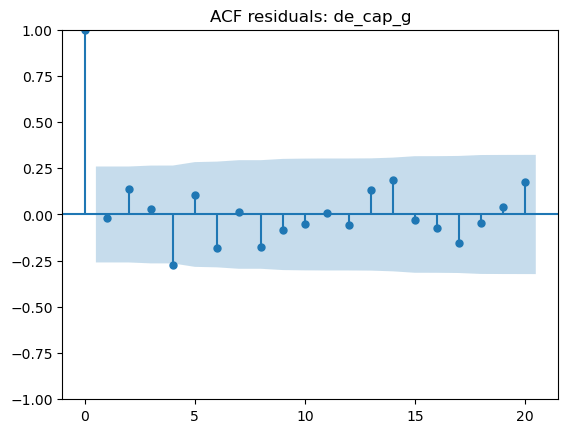

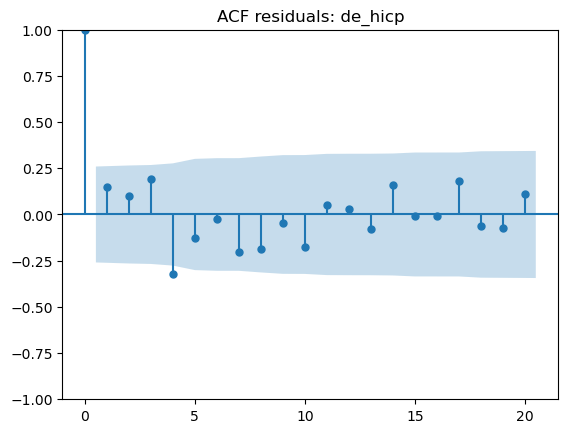

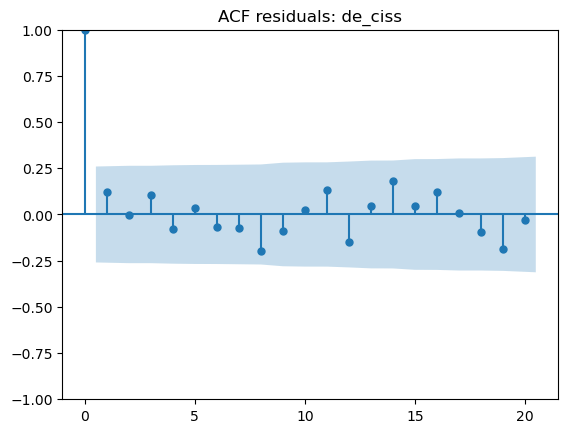

In [27]:
for name in model_var2.resid.columns:
    sm.graphics.tsa.plot_acf(model_var2.resid[name], lags=20, title=f"ACF residuals: {name}")


Comments:
- looking at ACF, it seems that there is some mild autocorrelation at lag 4 for capital and inflation, but that really does not look that bad
- the Portmanteau test was however strongly rejected, which can be due to several other factors:
    - the multivariate test aggregates small signals across equations and lags
    - the test also accounts for cross autocorrelations between series, not shown in the single ACF plots above
    - sample size is small, the test may have high power and reject for small effects
    - model misspecification, heteroskedasticity (look at the series for the CISS index...), structural breaks can produce residual dependence that is subtle in plots but sizeable in the test

Bottom line: mild residual correlation will not hurt forecast accuracy much. If the model is stable and the forecasts look sensible, mild lag-4 autocorrelation is really not a red flag. Moreover, adding a second lag (try it) does not really yield significant improvement, so one would need to go up to 4 lags and the model would become very heavy. I'll stick with the 1-lag model

### 2.2. Forecast

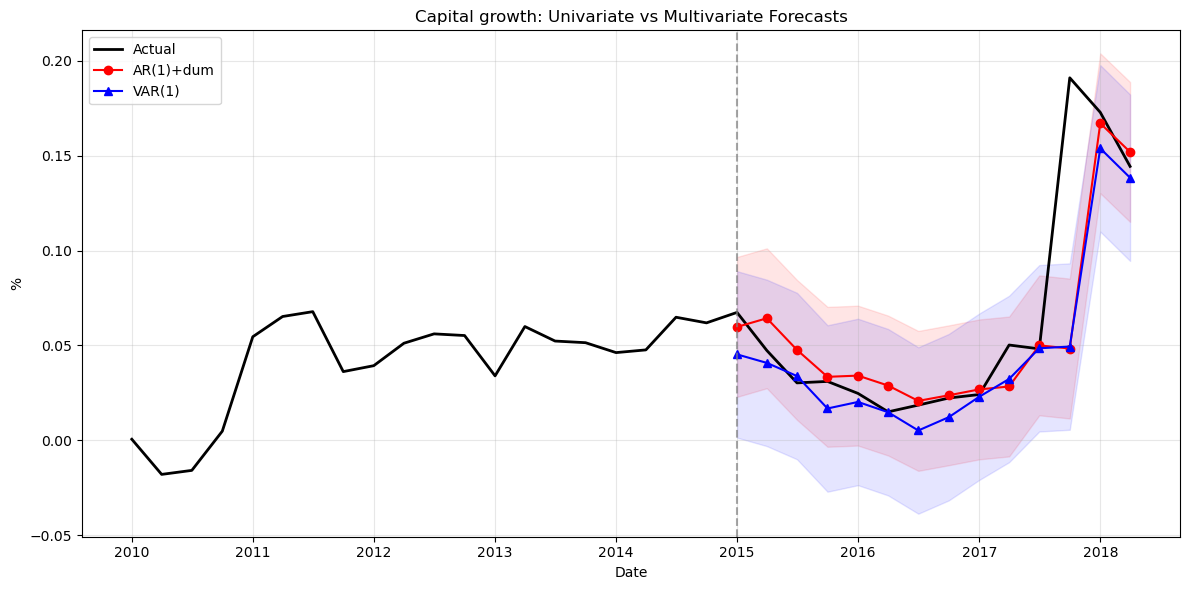

In [28]:
# Get full data including test period
df_var_full = final_df[['de_cap_g','de_hicp','de_ciss']].dropna()

# Manual 1-step ahead forecasts using VAR parameters
params = model_var2.params  # Matrix of parameters
coef_matrix = model_var2.coefs[0]  # Coefficient matrix for lag 1
intercept = model_var2.intercept  # Intercept vector

# Index of de_cap_g in the VAR (first variable)
cap_idx = 0

forecast_var = []

for date in test_series.index:
    # Get lagged values (t-1) for all 4 variables
    prev_period = date - 1
    lagged_values = df_var_full.loc[prev_period].values
    
    # Compute forecast: intercept + coef_matrix @ lagged_values
    forecast_all = intercept + coef_matrix @ lagged_values
    
    # Extract forecast for de_hicp
    forecast_var.append(forecast_all[cap_idx])

forecast_var = pd.Series(forecast_var, index=test_series.index)

# Calculate confidence intervals for VAR model
var_resid_cap = model_var2.resid['de_cap_g']
model_std_var = var_resid_cap.std()
forecast_lower_var = forecast_var - 1.96*model_std_var
forecast_upper_var = forecast_var + 1.96*model_std_var

# Plot
plot_data = final_df['de_cap_g'].loc["2010Q1":test_end].dropna()

plt.figure(figsize=(12, 6))
plt.plot(plot_data.index.to_timestamp(), plot_data,label='Actual', color='black', linewidth=2)
# VAR forecast and confidence bands
plt.plot(forecast_ar1_dum.index.to_timestamp(), forecast_ar1_dum,label='AR(1)+dum', color='red', marker='o', linewidth=1.5)
plt.fill_between(forecast_ar1_dum.index.to_timestamp(),
                 forecast_lower, 
                 forecast_upper,
                 color='red', alpha=0.1)
# VAR forecast and confidence bands
plt.plot(forecast_var.index.to_timestamp(), forecast_var, 
         label='VAR(1)', color='blue', marker='^', linewidth=1.5)
plt.fill_between(forecast_var.index.to_timestamp(),
                 forecast_lower_var,
                 forecast_upper_var,
                 color='blue', alpha=0.1)

plt.axvline(pd.Timestamp('2015-01-01'), color='gray', linestyle='--', alpha=0.7)
plt.title('Capital growth: Univariate vs Multivariate Forecasts')
plt.xlabel('Date')
plt.ylabel('%')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [29]:
# Calculate metrics for VAR
mse_var = ((test_series - forecast_var)**2).mean()
mae_var = np.abs(test_series - forecast_var).mean()

# Print comparison table
print("Forecast Accuracy Comparison (2015Q1-2018Q2)")
print("=" * 50)
comparison = pd.DataFrame({
    'Model': ['AR(1)+dum', 'VAR(1)'],
    'MSE': [mse, mse_var],
    'MAE': [mae, mae_var]
})
print(comparison.to_string(index=False))
print("=" * 50)

Forecast Accuracy Comparison (2015Q1-2018Q2)
    Model      MSE      MAE
AR(1)+dum 0.001564 0.018132
   VAR(1) 0.001560 0.018625


Final comments:
- same performance between the two models that were considered
- it doesn't mean that there isn't a VAR specification that improves upon the univariate model, perhaps you found one
- I didn't check for heteroskedasticity and normality of the VAR residuals. Technically it should be done, but the first-order issue is serial autocorrelation
- Given the results of homework 1, the in-sample fit of the VAR could certainly be improved by adding a step dummy as I did with the AR process (which also fixed the normality of the residuals). Try it and see whether it improves the forecast accuracy